# LAB 2 
Part I

Numerical free fall time (no drag): 28.56 s
Difference between numerical and analytical time: 0.0000 s


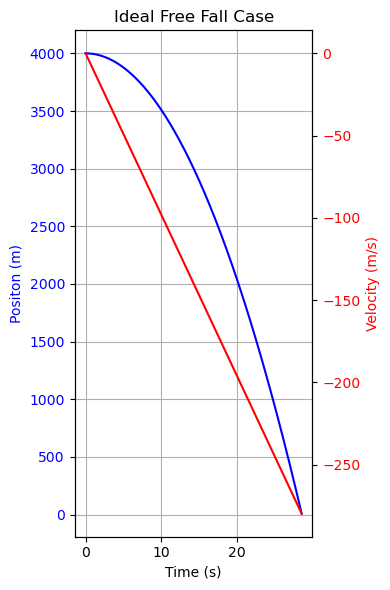

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# constants
# G = 6.673E-11 
#g_o = 9.81
#Me = 5.972E24 
#Mm = 7.35E22
#Re = 6378.1
#Rm = 1738.1
#rot = 7.272E-5
g = 9.81
y0 = 4000
v0 = 0
a = 0
gamma = 2

analytic = np.sqrt(2*y0/g)

def ideal(t, Y, a, gamma):
    y, v = Y
    dydt = v
    dvdt = -g - a*v**gamma
    return [dydt, dvdt]

def ground(t, Y, a, gamma):
    return Y[0]

ground.terminal = True
ground.direction = -1

t_span = (0, 2*analytic)
y0_vec = [y0,v0]

sol = solve_ivp(ideal, t_span, y0_vec, args=(a,gamma), events=ground, t_eval=np.linspace(0,2*analytic, 1000))

t_vals = sol.t
y_vals = sol.y[0]
v_vals = sol.y[1]
numerical = sol.t_events[0][0]

print(f'Numerical free fall time (no drag): {numerical:.2f} s')
print(f'Difference between numerical and analytical time: {abs(analytic-numerical):.4f} s')

fig, ax1 = plt.subplots(figsize=(4,6))

ax1.plot(t_vals, y_vals, 'b-', label='Position (m)')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Positon (m)', color = 'b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(t_vals, v_vals, 'r-', label='Velocity (m/s)')
ax2.set_ylabel('Velocity (m/s)', color = 'r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Ideal Free Fall Case')
fig.tight_layout()

Part II

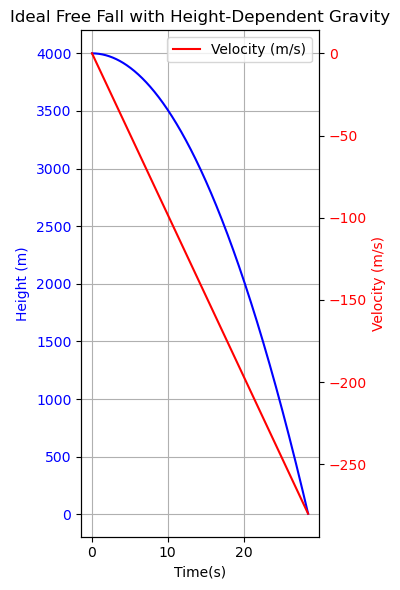

In [2]:
g0 = 9.81
R = 6378.1E3

def var_g(t, Y):
    y, v = Y
    r = R + y
    g_y = g0*(r/R)
    dydt = v
    dvdt = -g_y
    return [dydt, dvdt]

def ground(t, Y):
    return Y[0]
ground.terminal = True
ground.direction = -1

t_span = (0, 2*analytic)
y0_vector = [y0,v0]
sol_var_g = solve_ivp(var_g, t_span, y0_vector, events=ground, t_eval=np.linspace(0,2*analytic, 1000))

numerical_var_g = sol_var_g.t_events[0][0]

fig, ax3 = plt.subplots(figsize=(4,6))

ax3.plot(sol_var_g.t, sol_var_g.y[0], 'b-', label='Position above shaft bottom (m)')
ax3.set_xlabel('Time(s)')
ax3.set_ylabel('Height (m)', color='b')
ax3.tick_params(axis='y',labelcolor='b')
ax3.grid()

ax4 = ax3.twinx()
ax4.plot(sol_var_g.t, sol_var_g.y[1], 'r-', label='Velocity (m/s)')
ax4.set_ylabel('Velocity (m/s)', color='r')
ax4.tick_params(axis='y', labelcolor='r')

plt.legend()
plt.title('Ideal Free Fall with Height-Dependent Gravity')
plt.tight_layout()

### What effect does incorporating height-dependent g have on fall time?

The fall time should increase slightly because the effective gravity is weaker at higher altitudes. The curve does look similar to the constant g case, but the velocity will be slightly lower at any given time. 

In [3]:
a = g0/(50**2)
gamma = 2

def var_g_drag(t, Y):
    y, v = Y
    r = R + y
    g_y = g0*(r/R)
    dydt = v
    dvdt = -g_y - a * np.abs(v)**gamma * np.sign(v)
    return [dydt, dvdt]

def ground(t, Y, a, gamma):
    return Y[0]

ground.terminal = True
ground.direction = -1

t_span = (0, 2*np.sqrt(2*y0/g0))
y0_vector = [y0, v0]

sol_var_g_drag = solve_ivp(var_g_drag, t_span, y0_vector, events=lambda t, Y: ground(t, Y, a, gamma), t_eval=np.linspace(0,2*analytic, 1000))

numerical_var_g_drag = sol_var_g_drag.t_events[0][0]

fig, ax5 = plt.subplots()

ax5.plot(sol_var_g_drag.t, sol_var_g_drag.y[0], 'b-', label='Position above shaft bottom (m)')
ax5.set_xlabel('Time(s)')
ax5.set_ylabel('Height (m)', color='b')
ax5.tick_params(axis='y',labelcolor='b')
ax5.grid()

ax6 = ax5.twinx()
ax6.plot(sol_var_g_drag.t, sol_var_g_drag.y[1], 'r-', label='Velocity (m/s)')
ax6.set_ylabel('Velocity (m/s)', color='r')
ax6.tick_params(axis='y', labelcolor='r')

plt.title('Ideal Free Fall with Drag & Height-Dependent Gravity')
plt.tight_layout()


IndexError: index 0 is out of bounds for axis 0 with size 0

### How does drag affect fall time

With drag, velocity is limited by air resistance, and acceleration decreases over time, which results in a longer fall time when drag is included. 

Part III

The test mass bumps into the wall before reaching the bottom.


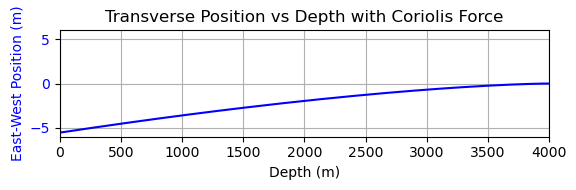

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
g0 = 9.81  # Gravitational acceleration (m/s^2)
omega_z = 7.272e-5  # Earth's rotation rate (rad/s)
y0 = 4000  # Initial depth (m)
v0 = 0  # Initial velocity (m/s)
m = 1  # Assume mass of the test object (kg)

# Initial conditions for position and velocity
x0 = 0  # Initial east-west position (m)
v_x0 = 0  # Initial velocity in the east-west direction (m/s)
v_y0 = 0  # Initial velocity in the mineshaft direction (m/s)

# Define the system of ODEs including Coriolis force
def coriolis(t, Y):
    x, v_x, y, v_y, z, v_z = Y
    dydt = [v_x, 
            2 * omega_z * v_y,  # Coriolis acceleration in the x direction
            v_y, 
            -2 * omega_z * v_x - g0,  # Coriolis acceleration and gravity in the y direction
            v_z, 
            0]  # No force in the z direction
    return dydt

# Time span and initial conditions
t_span = (0, 500)  # Time span for the simulation, reduce this to prevent over-falling
y0_vector = [x0, v_x0, y0, v_y0, 0, 0]  # Initial positions and velocities

# Solve the system of equations
sol = solve_ivp(coriolis, t_span, y0_vector, t_eval=np.linspace(0, 500, 1000))

# Extract position and velocity data
x_vals = sol.y[0]  # East-west position
y_vals = sol.y[2]  # Depth position (mineshaft)
v_x_vals = sol.y[1]  # Velocity in the east-west direction
v_y_vals = sol.y[3]  # Velocity in the mineshaft direction

# Check if the transverse position exceeds 2.5m before reaching the bottom
bump_into_wall = np.any(np.abs(x_vals) > 2.5)

# Plot the transverse position (east-west) as a function of depth (mineshaft)
fig, ax = plt.subplots(figsize=(6,2))

ax.plot(y_vals, x_vals, 'b-', label='Transverse Position vs Depth')
ax.set_xlabel('Depth (m)')
ax.set_ylabel('East-West Position (m)', color='b')
ax.tick_params(axis='y', labelcolor='b')
ax.set_title('Transverse Position vs Depth with Coriolis Force')
ax.grid()

ax.set_xlim([0, 4000])  # Depth range 
ax.set_ylim([-6, 6])

plt.tight_layout()

if bump_into_wall:
    print("The test mass bumps into the wall before reaching the bottom.")
else:
    print("The test mass reaches the bottom without hitting the wall.")


The test mass bumps into the wall before reaching the bottom.


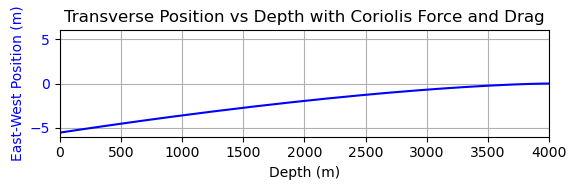

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
g0 = 9.81  # Gravitational acceleration (m/s^2)
omega_z = 7.272e-5  # Earth's rotation rate (rad/s)
y0 = 4000  # Initial depth (m)
v0 = 0  # Initial velocity (m/s)
m = 1  # Assume mass of the test object (kg)
alpha = g0/(50**2)  # Drag coefficient (adjust as needed)

# Initial conditions for position and velocity
x0 = 0  # Initial east-west position (m)
v_x0 = 0  # Initial velocity in the east-west direction (m/s)
v_y0 = 0  # Initial velocity in the mineshaft direction (m/s)

# Define the system of ODEs including Coriolis force and drag
def coriolis_drag(t, Y):
    x, v_x, y, v_y, z, v_z = Y
    dydt = [v_x, 
            2 * omega_z * v_y - alpha * v_x,  # Coriolis acceleration and drag in the x direction
            v_y, 
            -2 * omega_z * v_x - g0 - alpha * v_y,  # Coriolis acceleration, gravity, and drag in the y direction
            v_z, 
            0]  # No force in the z direction
    return dydt

# Time span and initial conditions
t_span = (0, 500)  # Time span for the simulation
y0_vector = [x0, v_x0, y0, v_y0, 0, 0]  # Initial positions and velocities

# Solve the system of equations
sol = solve_ivp(coriolis_drag, t_span, y0_vector, t_eval=np.linspace(0, 500, 1000))

# Extract position and velocity data
x_vals = sol.y[0]  # East-west position
y_vals = sol.y[2]  # Depth position (mineshaft)
v_x_vals = sol.y[1]  # Velocity in the east-west direction
v_y_vals = sol.y[3]  # Velocity in the mineshaft direction

# Check if the transverse position exceeds 2.5m before reaching the bottom
bump_into_wall = np.any(np.abs(x_vals) > 2.5)

# Plot the transverse position (east-west) as a function of depth (mineshaft)
fig, ax = plt.subplots(figsize=(6,2))

ax.plot(y_vals, x_vals, 'b-', label='Transverse Position vs Depth')
ax.set_xlabel('Depth (m)')
ax.set_ylabel('East-West Position (m)', color='b')
ax.tick_params(axis='y', labelcolor='b')
ax.set_title('Transverse Position vs Depth with Coriolis Force and Drag')
ax.grid()

ax.set_xlim([0, 4000])  # Depth range 
ax.set_ylim([-6, 6])

plt.tight_layout()

if bump_into_wall:
    print("The test mass bumps into the wall before reaching the bottom.")
else:
    print("The test mass reaches the bottom without hitting the wall.")


### Does drag make a difference?

Drag should makes a difference, slowing down the vertical velocity, thus slowing down the 

Part IV

Time to reach center: 1267.27 seconds
Speed at center: -7904.51 m/s
Time to reach other side: 2534.53 seconds
Orbital period at surface: 5069.86 seconds
Time to reach other side through tunnel: 2534.53 seconds


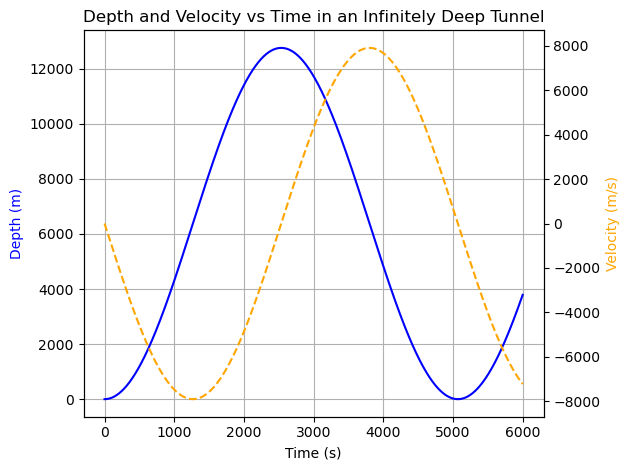

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G = 6.673E-11    # Gravitational constant (m^3 kg^-1 s^-2)
M_earth = 5.972E24 # kg 
R_earth = 6378.1E3 # m 
rho_earth = M_earth/((4/3)*np.pi*R_earth**3) # constant density

# acceleration function for a uniform density earth
def accel_uniform(t, y):
    r = y[0]
    a = -(4/3)*np.pi*G*rho_earth*r
    return [y[1], a]

# Time span
t_span = (0, 6000)  
y0 = [R_earth, 0]
t_eval = np.linspace(*t_span, 1000)

# Solve ODE
sol = solve_ivp(accel_uniform, t_span, y0, t_eval=t_eval, max_step=1)


# Plot depth vs time
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

depth = R_earth - sol.y[0] # distance from surface

ax1.plot(sol.t, depth/1000, label='Depth', color = 'blue')
ax2.plot(sol.t, sol.y[1], '--', label='Velocity', color = 'orange')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Depth (m)', color='blue')
ax2.set_ylabel('Velocity (m/s)', color='orange')
ax1.grid(True)
plt.title('Depth and Velocity vs Time in an Infinitely Deep Tunnel')
fig.tight_layout()

# time to reach center 
id_center = np.argmin(np.abs(sol.y[0]))
time_center = sol.t[id_center]
speed_center = sol.y[1][id_center]

#time to reach other side
id_diameter = np.argmin(np.abs(sol.y[0] + R_earth))
time_diameter = sol.t[id_diameter]

print(f'Time to reach center: {time_center:.2f} seconds')
print(f'Speed at center: {speed_center:.2f} m/s')
print(f'Time to reach other side: {time_diameter:.2f} seconds')

# Orbital period
v_orbit = np.sqrt(G * M_earth / R_earth)
T_orbit = 2 * np.pi * R_earth / v_orbit

print(f"Orbital period at surface: {T_orbit:.2f} seconds")
print(f"Time to reach other side through tunnel: {time_diameter:.2f} seconds")


Part V

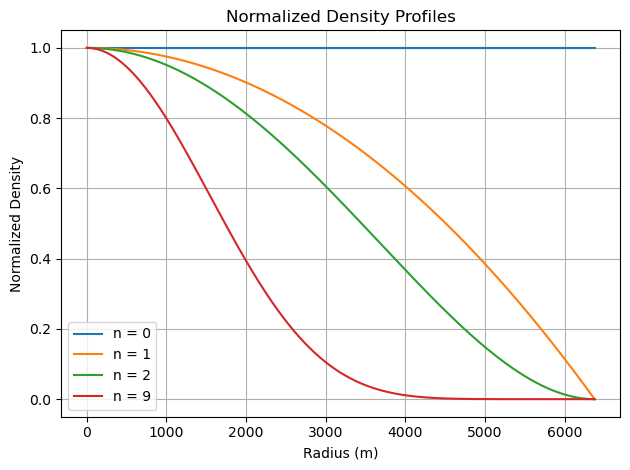

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import quad
from scipy.integrate import solve_ivp

R_earth = 6.3781E6 # meters
M_earth = 5.972E24 # kilograms
G = 6.6743E11 #m^3/kg/s^2
r_vals = np.linspace(0, R_earth, 1000)

# normalized density profile 

def p_profile(r,n):
    return (1-(r**2/R_earth**2))**n

n_vals = [0,1,2,9]

fig, ax = plt.subplots()
for n in n_vals:
    p_vals = p_profile(r_vals, n)
    ax.plot(r_vals/1000, p_vals, label=f'n = {n}')

ax.set_xlabel('Radius (m)')
ax.set_ylabel('Normalized Density')
ax.set_title('Normalized Density Profiles')
ax.legend()
ax.grid()
plt.tight_layout()


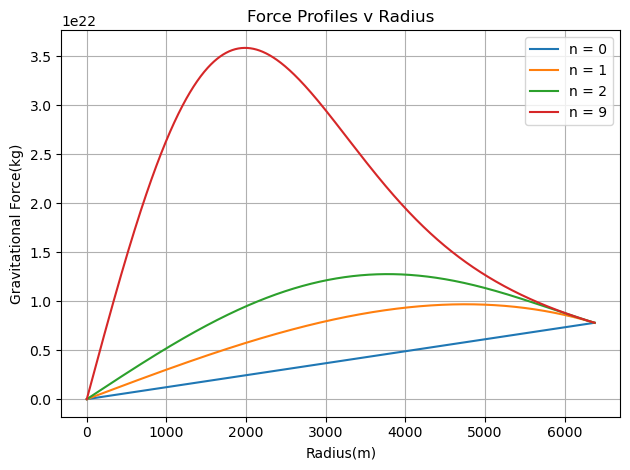

In [8]:
# compute p_n numerically

def compute_p_n(n):
    integrand = lambda r: (1-(r**2/R_earth**2))**n * r**2
    volume_integral, _ = quad(integrand, 0, R_earth)
    p_n = M_earth/(4*np.pi*volume_integral)
    return p_n

# gravitationnal force as a function of radius and density

def gravity_force(r, n, p_n):
    integrand = lambda r_prime: p_n * (1 - (r_prime**2/R_earth**2))**n * r_prime**2
    m_r, _ = quad(integrand, 0, r)
    return G * m_r / r**2

fig, ax = plt.subplots()
for n in n_vals:
    p_n = compute_p_n(n)
    F_vals = [gravity_force(r, n, p_n) if r > 1 else 0 for  r in r_vals]
    ax.plot(r_vals/1000, F_vals, label = f'n = {n}')

ax.set_xlabel('Radius(m)')
ax.set_ylabel('Gravitational Force(kg)')
ax.set_title('Force Profiles v Radius')
ax.legend()
ax.grid(True)
plt.tight_layout()

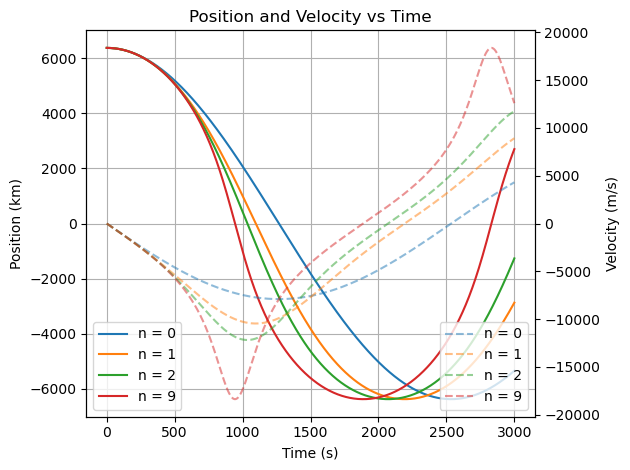

In [19]:
import numpy as np
from scipy.integrate import quad, solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # gravitational constant (m^3 kg^-1 s^-2)
R_earth = 6.3781e6  # m
M_earth = 5.972e24  # kg

# Function to compute normalization constant rho_n
def compute_rho_n(n):
    integrand = lambda r: (1 - (r**2 / R_earth**2))**n * r**2
    integral, _ = quad(integrand, 0, R_earth)
    return M_earth / (4 * np.pi * integral)

# Simplified acceleration function generator
def accel_func(n, rho_n):
    def accel(t, y):
        r = y[0]
        r_abs = abs(r)
        if r_abs == 0:
            return [y[1], 0]
        integrand = lambda r_prime: (1 - (r_prime**2 / R_earth**2))**n * r_prime**2
        mass_r, _ = quad(integrand, 0, r_abs)
        M_r = 4 * np.pi * rho_n * mass_r
        a = -G * M_r / (r_abs**2) * np.sign(r)
        return [y[1], a]
    return accel

# Time span and initial conditions
t_span = (0, 3000)
y0 = [R_earth, 0]
t_eval = np.linspace(*t_span, 1000)
n_vals = [0, 1, 2, 9]

# Plotting
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for n in n_vals:
    rho_n = compute_rho_n(n)
    sol = solve_ivp(accel_func(n, rho_n), t_span, y0, t_eval=t_eval, max_step=1)
    ax1.plot(sol.t, sol.y[0] / 1000, label=f"n = {n}")
    ax2.plot(sol.t, sol.y[1], '--', alpha=0.5, label=f"n = {n}")

# Labels and formatting
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Position (km)")
ax2.set_ylabel("Velocity (m/s)")
ax1.set_title("Position and Velocity vs Time")
ax1.legend(loc="lower left")
ax2.legend(loc="lower right")
ax1.grid(True)
plt.tight_layout()
plt.show()



In [13]:
print('Time to center and speed at center for each n:\n')

for n in n_vals:
    rho_n = compute_rho_n(n)
    sol = solve_ivp(accel_func(n, rho_n), t_span, y0, t_eval=t_eval, max_step=1)
    id_center = np.argmin(np.abs(sol.y[0]))
    time_center = sol.t[id_center]
    speed_center = abs(sol.y[1][id_center])
    print(f'n = {n}:')
    print(f'Time to center = {time_center:.2f} s')
    print(f'Speed at center = {speed_center:.2f} m/s\n')

Time to center and speed at center for each n:

n = 0:
Time to center = 1267.27 s
Speed at center = 7905.28 m/s

n = 1:
Time to center = 1096.10 s
Speed at center = 10457.70 m/s

n = 2:
Time to center = 1036.04 s
Speed at center = 12182.81 m/s

n = 9:
Time to center = 2831.83 s
Speed at center = 18370.59 m/s



Part VI

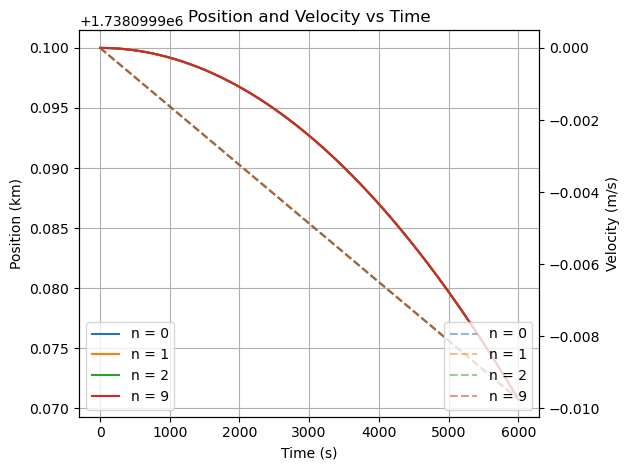

In [20]:
R_moon = 1738.1E6 #km
M_moon = 7.35E22 #kg

def compute_rho_n(n):
    integrand = lambda r: (1 - (r**2 / R_moon**2))**n * r**2
    integral, _ = quad(integrand, 0, R_moon)
    return M_moon / (4 * np.pi * integral)

# Simplified acceleration function generator
def accel_func(n, rho_n):
    def accel(t, y):
        r = y[0]
        r_abs = abs(r)
        if r_abs == 0:
            return [y[1], 0]
        integrand = lambda r_prime: (1 - (r_prime**2 / R_moon**2))**n * r_prime**2
        mass_r, _ = quad(integrand, 0, r_abs)
        M_r = 4 * np.pi * rho_n * mass_r
        a = -G * M_r / (r_abs**2) * np.sign(r)
        return [y[1], a]
    return accel

# Time span and initial conditions
t_span = (0, 6000)
y0 = [R_moon, 0]
t_eval = np.linspace(*t_span, 1000)
n_vals = [0, 1, 2, 9]

# Plotting
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for n in n_vals:
    rho_n = compute_rho_n(n)
    sol = solve_ivp(accel_func(n, rho_n), t_span, y0, t_eval=t_eval, max_step=1)
    ax1.plot(sol.t, sol.y[0] / 1000, label=f"n = {n}")
    ax2.plot(sol.t, sol.y[1], '--', alpha=0.5, label=f"n = {n}")

# Labels and formatting
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Position (km)")
ax2.set_ylabel("Velocity (m/s)")
ax1.set_title("Position and Velocity vs Time")
ax1.legend(loc="lower left")
ax2.legend(loc="lower right")
ax1.grid(True)
plt.tight_layout()
plt.show()


In [22]:
import numpy as np

G = 6.67430E-11  # m^3/kg/s^2
R_moon = 1738.1E3  # m
M_moon = 7.35E22  # kg

# surface gravity
g_moon = G * M_moon / R_moon**2

# fall time to center
fall_time_half_moon = (np.pi / 2) * np.sqrt(R_moon / g_moon)

print(f"Time to center of Moon: {fall_time_half_moon:.2f} seconds")


Time to center of Moon: 1625.12 seconds


In [23]:
R_earth = 6378.1E3 # m 
M_earth = 5.972E24 # kg

rho_earth = M_earth/ ((4/3)*np.pi*R_earth**3)
rho_moon = M_moon/ ((4/3)*np.pi*R_moon**3)

print(f'Earth density: {rho_earth:.2f} kg/m^3')
print(f'Moon density: {rho_moon:.2f} kg/m^3')
print(f'Density ratio: {rho_moon/rho_earth:.4f}')

Earth density: 5494.87 kg/m^3
Moon density: 3341.75 kg/m^3
Density ratio: 0.6082
